In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
from hyperstrings.hypergraph import Hypergraph

vertex_labels: dict[int, str] = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'P', 6: 'Q', 7: 'R', 8: 'S'
}
hyperedge_labels: dict[int, str] = {
    0: 'f', 1: 'g', 2: 'h', 3: 'k'
}
hyperedge_sources: dict[int, list[int]] = {
    0: [0, 6], 1: [], 2: [1, 2], 3: [3]
}
hyperedge_targets: dict[int, list[int]] = {
    0: [1], 1: [2], 2: [5, 3, 8], 3: [4, 7]
}
inputs: list[int] = [0]
outputs: list[int] = [4, 5]

hypergraph = Hypergraph.simple_init(
    vertex_labels, hyperedge_labels,
    hyperedge_sources, hyperedge_targets,
    inputs, outputs
)

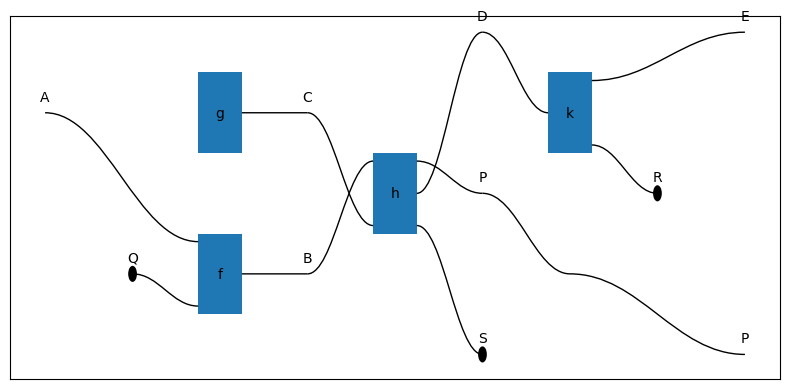

In [39]:
hypergraph.draw_matplotlib()

In [40]:
hypergraph.is_acyclic()

True

In [41]:
hyperedge_sources[0].append(7)
hyperedge_sources[1].append(8)
cyclic_hypergraph = Hypergraph.simple_init(
    vertex_labels, hyperedge_labels,
    hyperedge_sources, hyperedge_targets,
    inputs, outputs
)

In [42]:
cyclic_hypergraph.is_acyclic()

False

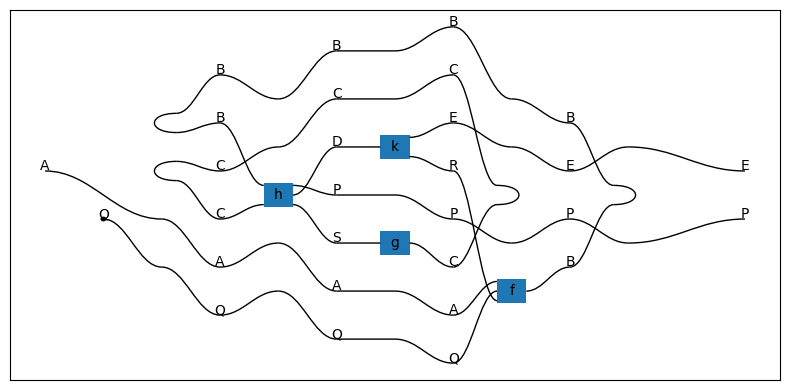

In [43]:
cyclic_hypergraph.make_cycles_explicit().draw_matplotlib()

In [44]:
from hyperstrings.hypergraph import Hypergraph

vertex_labels: dict[int, str] = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'P', 6: 'Q', 7: 'R', 8: 'S', 9: 'A'
}
hyperedge_labels: dict[int, str] = {
    0: 'f', 1: 'g', 2: 'h', 3: 'k', 4: '_id_A'
}
hyperedge_sources: dict[int, list[int]] = {
    0: [0, 6],
    1: [0],
    2: [1, 0, 2],
    3: [3, 2],
    4: [9]
}
hyperedge_targets: dict[int, list[int]] = {
    0: [1, 2],
    1: [2, 2],
    2: [5, 3, 8],
    3: [4, 7],
    4: [0]
}
inputs: list[int] = [9]
outputs: list[int] = [4, 5]

hypergraph = Hypergraph.simple_init(
    vertex_labels, hyperedge_labels,
    hyperedge_sources, hyperedge_targets,
    inputs, outputs
)

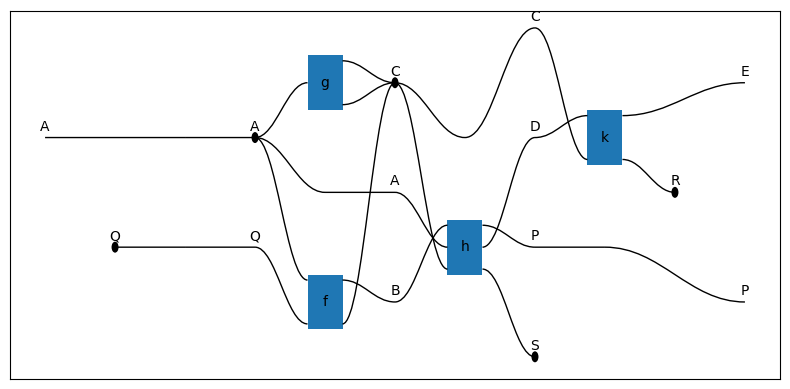

In [45]:
hypergraph.draw_matplotlib()

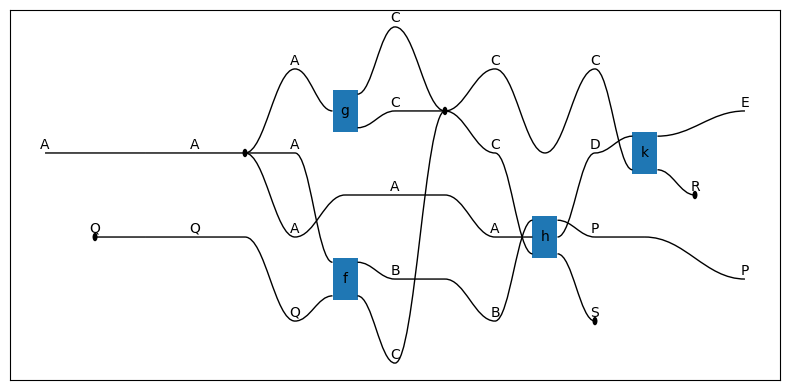

In [46]:
hypergraph.make_spiders_explicit().draw_matplotlib()

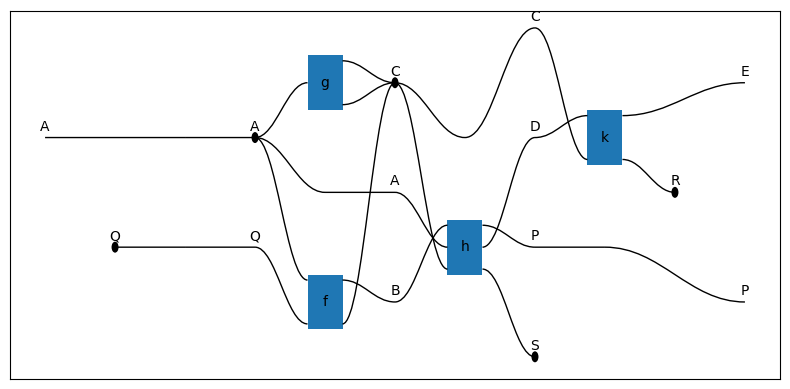

In [47]:
hypergraph.make_spiders_explicit().make_spiders_implicit().draw_matplotlib()

In [48]:
hyperedge_sources[0].append(7)
hyperedge_sources[1].append(8)
cyclic_hypergraph = Hypergraph.simple_init(
    vertex_labels, hyperedge_labels,
    hyperedge_sources, hyperedge_targets,
    inputs, outputs
)

In [49]:
cyclic_hypergraph.is_acyclic()

False

In [50]:
explicit_spiders = cyclic_hypergraph.make_spiders_explicit()

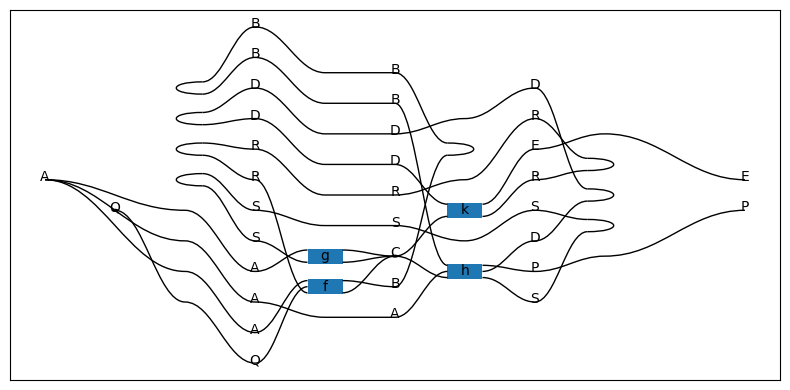

In [51]:
explicit_cycles = explicit_spiders.make_cycles_explicit().make_spiders_implicit()
explicit_cycles.normal_form().draw_matplotlib()

In [52]:
# constrict cap/cups state pushforward, effect pushback
# explicit permutations
# minimize swaps